# PFAS Toolbox - Thomas Dairy Data Comparison

## Prep Workspace

### Libraries Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet
import seaborn as sns
import openpyxl 
from matplotlib.ticker import AutoMinorLocator
from matplotlib.font_manager import FontProperties

### Data Import

In [2]:
def read_excel_sheet(excel_file, sheet_name):
    """
    Read a specific sheet from an Excel file into a DataFrame.

    Args:
        excel_file (str): The path to the Excel file.
        sheet_name (str): The name of the sheet to read.

    Returns:
        pd.DataFrame or None: A DataFrame containing the sheet data or None if the sheet is not found.
    """
    try:
        # Load the specified sheet from the Excel file into a DataFrame
        df = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=1)
        return df
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [3]:
def dfs_to_excel(dfs, filename):
    """
    Write an array of dataframes to separate tabs in an Excel file.
    
    Parameters:
    - dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
    - filename: The name of the Excel file to write to.
    """
    # Create a Pandas Excel writer using XlsxWriter as the engine.
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        for tab_name, df in dfs.items():
            # Write each dataframe to a separate sheet
            df.to_excel(writer, sheet_name=tab_name)
    
    print(f"File '{filename}' has been written with {len(dfs)} tabs.")

In [4]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 05-28-2024.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()

,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


### Import Other Data

In [5]:
# Import PFAS Attributes

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 05-28-2024.xlsm'
#Specify sheet name
sheet_name = 'PFAS Attributes'

df_PFAS_Attributes = pd.read_excel(excel_file_path, sheet_name=sheet_name)

In [6]:
# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))

In [7]:
# Load the Excel file into a DataFrame
df = pd.read_excel("U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/PFAS Toolbox_ColorsPalette.xlsx",sheet_name='ColorPalette_NonTOP')

def parse_rgb(rgb_string):
    # Check if rgb_string is a string and not empty
    if isinstance(rgb_string, str) and rgb_string:
        # Remove parentheses and split the string by commas
        rgb_values = rgb_string.strip('()').split(',')
        # Convert each value to float and return as a tuple
        return tuple(int(value)/255 for value in rgb_values)
    else:
        # Handle the case where rgb_string is not a string or is empty
        return None  # or return (0, 0, 0, 0) for a default transparent color, for example



# Create a dictionary with PFAS compounds as keys and corresponding colors as values
compound_colors_dict = {compound: parse_rgb(rgb) for compound, rgb in zip(df['Database'], df['New_RGB'])}
compound_colors_dict_abbrev = {abbrev: parse_rgb(rgb) for abbrev, rgb in zip(df['Abbrev'], df['New_RGB'])}

### Set Default Settings

In [8]:
# Set default tick label size
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22

# Set default font size for title, labels, and legend
plt.rcParams['axes.titlesize'] = 30  # Set the font size for plot titles
plt.rcParams['axes.labelsize'] = 24  # Set the font size for axis labels
plt.rcParams['legend.fontsize'] = 20  # Set the font size for legend
plt.rcParams['legend.title_fontsize'] = 20  # Set the font size for legend

# Set default font family to Arial
plt.rcParams['font.family'] = 'Arial'

# Set default font type for plot titles to bold
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'  #for stack bars

## Compare PFAS Concentrations and Composition at Various Sites

### Prep Data
Remove: 
- First records with first sample date in 2023 (07-14-2023) for Thomas Dairy Control Site Well
- Last Fanno at Durham Rd (04-23-2024) because it was actually a blank sample

In [9]:
# Define the conditions for rows to be removed
condition1 = (data_df['Sample Location'] == 'Thomas Dairy Control Site Well') & (data_df['Sample Date'] == '2023-07-14')
condition2 = (data_df['Sample Location'] == 'Fanno at Durham Rd') & (data_df['Sample Date'] == '2024-04-23')

# Combine conditions using logical OR (|)
conditions = condition1 | condition2
# Invert the conditions to keep rows that do not match them
filtered_df = data_df[~conditions]

### Functions

In [10]:
def PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                              filter_sample_location=None, start_date=None, end_date=None):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if len(filter_pfas_compound) > 0:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if len(filter_sample_location) >0:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='Sample Location', columns='PFAS Compound', aggfunc='mean', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [11]:
def PivotTable_CountPFASCompound_FilterByCompoundSamplingDatesLocation(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                              filter_sample_location=None, start_date=None, end_date=None):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if len(filter_pfas_compound) > 0:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if len(filter_sample_location) >0:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='Sample Location', columns='PFAS Compound', aggfunc='count', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [12]:
def create_std_dev_pivot_table_with_filters(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                                            filter_sample_location=None, start_date=None, end_date=None):
    """
    Create a custom pivot table with multiple filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'. Calculates the standard deviation of the average.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom standard deviation pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if len(filter_pfas_compound) > 0:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if len(filter_sample_location) > 0:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and standard deviation of the average as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='Sample Location', columns='PFAS Compound',
                                     aggfunc=lambda x: np.std(x, ddof=1), fill_value=None)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [13]:
def calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate error values for each column in the average pivot table using standard deviation and count.

    Args:
        average_pivot (pd.DataFrame): Pivot table with average values.
        std_dev_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.

    Returns:
        pd.DataFrame: A new pivot table with error values for each column in the average pivot.
    """
    try:
        # Calculate error by dividing standard deviation by the square root of count
        error_pivot = std_dev_pivot / np.sqrt(count_pivot)

        return error_pivot

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [22]:
def create_stacked_bar_chart_filtered(avg_pivot_table, std_dev_pivot_table=None, figsize=(10, 6), title='Average PFAS Concentrations by Sample Location', compound_colors_dict=None):
    try:
        # Filter out locations with all zeros in avg_pivot_table
        avg_pivot_table_filtered = avg_pivot_table.loc[:, (avg_pivot_table != 0).any(axis=0)]
        
        # Filter std_dev_pivot_table to match avg_pivot_table_filtered columns if not empty
        if std_dev_pivot_table is not None and not std_dev_pivot_table.empty:
            std_dev_pivot_table_filtered = std_dev_pivot_table[avg_pivot_table_filtered.columns]
        else:
            std_dev_pivot_table_filtered = pd.DataFrame(columns=avg_pivot_table_filtered.columns, index=avg_pivot_table_filtered.index)
        
        fig, ax = plt.subplots(figsize=figsize)
        bottom = np.zeros(len(avg_pivot_table_filtered.index))

        for compound in avg_pivot_table_filtered.columns:
            color = compound_colors_dict.get(compound, 'grey')  # Default grey color
            avg_values = avg_pivot_table_filtered[compound].values
            std_dev_values = std_dev_pivot_table_filtered.get(compound)
            
            bars = ax.bar(avg_pivot_table_filtered.index, avg_values, width=0.35, bottom=bottom, color=color, label=compound, yerr=std_dev_values,capsize=5)
            bottom += avg_values

        def split_label(label):
            if len(label) > 7:
                split_point = label.find(' ', 7)  # Find next space after 14th character
                if split_point != -1:
                    return label[:split_point] + '\n' + label[split_point + 1:]
            return label  # Return label unmodified if it's short enough or no space found

        xtick_labels = [split_label(label) for label in avg_pivot_table_filtered.index]
        ax.set_xticklabels(xtick_labels, rotation=0, ha='center')

        # Sample Type Annotations
        sample_types = ['Ambient', 'Effluent', 'Groundwater']
        positions = [.5, 2, 4.5]  # Center positions of the grouped bars for each sample type
        for label, pos in zip(sample_types, positions):
            ax.text(pos, -0.1*max(bottom)-1.5, label, ha='center', va='top', fontsize=24, fontdict={'family': 'Arial', 'weight': 'normal'})

        ax.set_xlabel('',fontsize=24)
        ax.set_ylabel('Average Concentration (ng/L)',fontsize=24)
        ax.set_title(title)
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        # Generate legend only for compounds actually plotted
        legend_handles, legend_labels = ax.get_legend_handles_labels()
        ax.legend(handles=legend_handles, labels=legend_labels, title='PFAS Compounds', loc='lower center',bbox_to_anchor=(0.5, -0.4),ncol=7,fontsize=20,title_fontsize=22)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

### Define Filters and Settings

In [15]:
# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','', 'probaly ok','probably okay','Probably okay','Probably OK']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound=['HFPO-DA','Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid',
                      'Perfluoroheptanesulfonic acid','Perfluoroheptanoic acid','Perfluorohexanesulfonic acid',
                      'Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)',
                      'Perfluorooctanoic acid (PFOA)','Perfluoropentanesulfonic acid','Perfluoropentanoic acid']

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location=['Durham Effluent','Fanno at Durham Rd','Rock @ Brookwood','Thomas Dairy B-2 Pore Water','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2022-01-01'

#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-04-30'

locations_order = ['Fanno at Durham Rd','Rock @ Brookwood','Durham Effluent', 'Thomas Dairy Control Site Well','Thomas Dairy Site 1 Well', 'Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']

### Create Pivot Table for Average PFAS Compound Concentrations at Various Sites

In [16]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=filtered_df,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, start_date=start_date, end_date=end_date)
avg_pivot_table.columns = avg_pivot_table.columns.map(pfas_mapping)

desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in avg_pivot_table.columns]
# Reorder the DataFrame
avg_pivot_table = avg_pivot_table[filtered_order]

filtered_order = [item for item in locations_order if item in avg_pivot_table.index]
# Reorder the DataFrame
avg_pivot_table = avg_pivot_table.loc[filtered_order]

avg_pivot_table.index = avg_pivot_table.index.str.replace('@', 'at')

avg_pivot_table

PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFBS,PFPeS,PFHxS,PFHpS,PFOS,HFPO-DA,FOSA
Sample Location,,,,,,,,,,,,,,
Fanno at Durham Rd,3.696000,5.458000,5.162000,2.492000,6.100000,1.052000,0.878800,5.190000,0.519600,3.808000,0.01200,11.900000,0.000000,0.576000
Rock at Brookwood,4.082500,4.687500,4.417500,2.030000,5.337500,0.976750,0.623750,3.955000,0.145000,2.420000,0.00000,8.975000,0.000000,0.380000
Durham Effluent,5.738750,8.580000,10.612500,1.588750,7.186250,0.602250,0.455500,6.150000,0.383875,1.750000,0.03925,6.142500,0.000000,0.001125
Thomas Dairy Control Site Well,7.300000,6.500000,7.700000,1.850000,7.900000,0.325000,0.000000,7.500000,0.940000,11.000000,0.12500,5.150000,0.000000,0.145000
Thomas Dairy Site 1 Well,4.700000,1.800000,1.766667,0.693333,3.766667,0.283333,0.133333,3.550000,0.600000,5.233333,0.00000,5.900000,0.223333,0.203333
Thomas Dairy Site 2 Well,5.133333,0.426667,0.433333,0.000000,2.400000,0.146667,0.000000,3.866667,0.733333,6.266667,0.00000,4.933333,0.000000,0.120000
Thomas Dairy Site 3 Well,4.766667,6.233333,4.966667,1.633333,6.433333,0.143333,0.000000,4.433333,0.720000,6.566667,0.00000,3.400000,0.000000,0.000000


### Create Pivot Table for Count of PFAS Compound Concentrations at Various Sites

In [17]:
# Example usage with filters: Create pivot table for count of PFAS Compound values at various locations, 

count_pivot_table = PivotTable_CountPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=filtered_df,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, start_date=start_date, end_date=end_date)
count_pivot_table.columns = count_pivot_table.columns.map(pfas_mapping)

desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in count_pivot_table.columns]
# Reorder the DataFrame
count_pivot_table = count_pivot_table[filtered_order]

filtered_order = [item for item in locations_order if item in count_pivot_table.index]
# Reorder the DataFrame
count_pivot_table = count_pivot_table.loc[filtered_order]

count_pivot_table.index = count_pivot_table.index.str.replace('@', 'at')
count_pivot_table

PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFBS,PFPeS,PFHxS,PFHpS,PFOS,HFPO-DA,FOSA
Sample Location,,,,,,,,,,,,,,
Fanno at Durham Rd,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Rock at Brookwood,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Durham Effluent,9,9,9,9,9,9,9,9,9,9,9,9,8,9
Thomas Dairy Control Site Well,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Thomas Dairy Site 1 Well,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Thomas Dairy Site 2 Well,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Thomas Dairy Site 3 Well,5,5,5,5,5,5,5,5,5,5,5,5,5,5


### Create Pivot Table with Sampling Standard Deviation for Each Compount at Each Site

In [18]:
# Create a custom standard deviation pivot table with multiple filters
std_dev_pivot_table = create_std_dev_pivot_table_with_filters(data_df=filtered_df,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, start_date=start_date, end_date=end_date)
std_dev_pivot_table.columns = std_dev_pivot_table.columns.map(pfas_mapping)

desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in std_dev_pivot_table.columns]
# Reorder the DataFrame
std_dev_pivot_table = std_dev_pivot_table[filtered_order]

filtered_order = [item for item in locations_order if item in std_dev_pivot_table.index]
# Reorder the DataFrame
std_dev_pivot_table = std_dev_pivot_table.loc[filtered_order]

std_dev_pivot_table.index = std_dev_pivot_table.index.str.replace('@', 'at')
std_dev_pivot_table


PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFBS,PFPeS,PFHxS,PFHpS,PFOS,HFPO-DA,FOSA
Sample Location,,,,,,,,,,,,,,
Fanno at Durham Rd,0.400100,0.588914,0.475626,0.263287,3.424179,0.053572,0.271601,0.600417,0.118578,0.765062,0.026833,1.931321,0.000000,1.088062
Rock at Brookwood,0.341406,0.839022,0.404011,0.101325,0.809707,0.087458,0.226766,0.704344,0.182848,0.636867,0.000000,1.314978,0.000000,0.542156
Durham Effluent,4.266235,3.410044,4.009052,1.368702,2.819946,0.563982,0.444584,2.559297,0.891534,1.296255,0.104667,3.428761,0.000000,0.003000
Thomas Dairy Control Site Well,1.897367,1.587451,2.168525,0.502684,1.158663,0.191202,0.000000,1.862794,0.136991,1.227464,0.125000,0.331662,0.000000,0.145000
Thomas Dairy Site 1 Well,1.334916,0.336155,0.580517,0.126610,0.938083,0.182757,0.178885,0.913783,0.079246,0.712741,0.000000,1.390324,0.299633,0.167392
Thomas Dairy Site 2 Well,1.883348,0.250460,0.581378,0.000000,1.281796,0.120706,0.000000,0.965919,0.273496,2.579147,0.000000,0.739594,0.000000,0.160997
Thomas Dairy Site 3 Well,1.188697,1.160603,1.139298,0.238747,1.634931,0.118237,0.000000,1.012423,0.131795,1.613382,0.000000,0.653452,0.000000,0.536656


### Create Standard Error Pivot Table

In [19]:
error_pivot_table= calculate_error_pivot(average_pivot=avg_pivot_table, std_dev_pivot=std_dev_pivot_table, count_pivot=count_pivot_table)
error_pivot_table

PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFBS,PFPeS,PFHxS,PFHpS,PFOS,HFPO-DA,FOSA
Sample Location,,,,,,,,,,,,,,
Fanno at Durham Rd,0.178930,0.263370,0.212706,0.117745,1.531339,0.023958,0.121464,0.268514,0.053030,0.342146,0.012000,0.863713,0.000,0.486596
Rock at Brookwood,0.170703,0.419511,0.202006,0.050662,0.404853,0.043729,0.113383,0.352172,0.091424,0.318434,0.000000,0.657489,0.000,0.271078
Durham Effluent,1.422078,1.136681,1.336351,0.456234,0.939982,0.187994,0.148195,0.853099,0.297178,0.432085,0.034889,1.142920,0.000,0.001000
Thomas Dairy Control Site Well,0.948683,0.793725,1.084262,0.251342,0.579332,0.095601,0.000000,0.931397,0.068496,0.613732,0.062500,0.165831,0.000,0.072500
Thomas Dairy Site 1 Well,0.596992,0.150333,0.259615,0.056622,0.419524,0.081731,0.080000,0.408656,0.035440,0.318748,0.000000,0.621772,0.134,0.074860
Thomas Dairy Site 2 Well,0.842259,0.112009,0.260000,0.000000,0.573236,0.053981,0.000000,0.431972,0.122311,1.153430,0.000000,0.330757,0.000,0.072000
Thomas Dairy Site 3 Well,0.531601,0.519038,0.509510,0.106771,0.731163,0.052877,0.000000,0.452769,0.058941,0.721526,0.000000,0.292233,0.000,0.240000


### Stacked Bar Chart with Error Bars

<ipython-input-22-bc17b0e89439>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=0, ha='center')


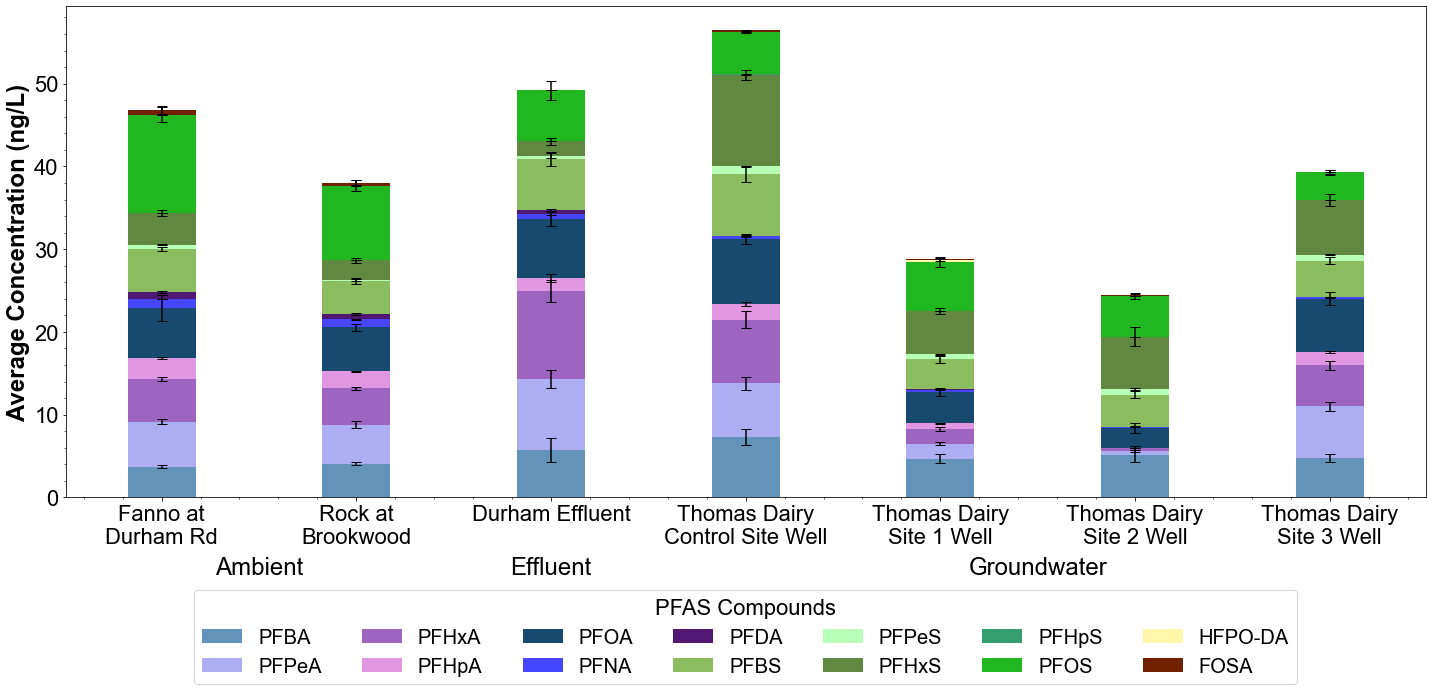

In [23]:
# Example: Create the stacked bar chart with custom figsize and error bars

#figsize (tuple, optional): Figure size (width, height) in inches (default is (10, 6)).
#Please adjust the plot size as necessart
figsize=(20, 10)

create_stacked_bar_chart_filtered(avg_pivot_table=avg_pivot_table, std_dev_pivot_table=error_pivot_table, title='',figsize=figsize, compound_colors_dict=compound_colors_dict_abbrev)  

## Compare March and April

### Prep data

In [18]:
data_locations = ['Durham Influent','Durham Effluent','Fanno at Durham Rd','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']

# Convert the 'Sampled Date' to datetime
data_df['Sampled Date'] = pd.to_datetime(data_df['Sampled Date'], errors='coerce')

data_compounds=data_df['PFAS Compound'].unique()

data_March = data_df[(data_df['Sampled Date'].dt.month == 3) & (data_df['Sampled Date'].dt.year == 2024) & (data_df['Sample Location'].isin(data_locations))]
data_April = data_df[(data_df['Sampled Date'].dt.month == 4) & (data_df['Sampled Date'].dt.year == 2024) & (data_df['Sample Location'].isin(data_locations))]



### Define Functions

In [19]:
def PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                              filter_sample_location=None, start_date=None, end_date=None,col_name= 'Quant Incl Estimates Incl Qual Flags'):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if len(filter_pfas_compound) > 0:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if len(filter_sample_location) >0:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values=col_name,
                                     index='Sample Location', columns='PFAS Compound', aggfunc='mean', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [36]:
def create_seasonal_stacked_bar_chart(season_1_data, season_2_data, figsize=(12, 8), title='Seasonal PFAS Concentrations by Sample Location', compound_colors_dict=None,
                                      title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12, bar_width=0.35):
    try:
        font_bold = FontProperties(family='Arial', weight='bold')
        
        # Prepare figure and axes
        fig, ax = plt.subplots(figsize=figsize)
        locations = season_1_data.index.intersection(season_2_data.index)
        
        # Position indices for the bars, now adjusted to include a gap
        x_indices = np.arange(len(locations)) 
        
        gap = 0.025  # This is the gap between bars
        adjusted_width = bar_width / 2 - gap / 2  # Adjust bar width to accommodate gap
        
        dry_bottom = {loc: 0 for loc in locations}
        wet_bottom = {loc: 0 for loc in locations}

        for compound in compound_colors_dict.keys():  # Ensures order is based on the color dictionary
            color = compound_colors_dict[compound]
            dry_heights = [season_1_data.at[loc, compound] if compound in season_1_data.columns else 0 for loc in locations]
            wet_heights = [season_2_data.at[loc, compound] if compound in season_2_data.columns else 0 for loc in locations]

            # Plot dry season data with adjusted positions
            ax.bar(x_indices - adjusted_width - gap, dry_heights, width=adjusted_width, bottom=[dry_bottom[loc] for loc in locations], color=color, label=compound, align='edge')
            # Update bottom heights
            dry_bottom = {loc: dry_bottom[loc] + height for loc, height in zip(locations, dry_heights)}

            # Plot wet season data with adjusted positions
            ax.bar(x_indices + gap, wet_heights, width=adjusted_width, bottom=[wet_bottom[loc] for loc in locations], color=color, label=compound, align='edge')
            # Update bottom heights
            wet_bottom = {loc: wet_bottom[loc] + height for loc, height in zip(locations, wet_heights)}

        # Calculate maximum stack height
        max_stack_height = max(max(dry_bottom.values()), max(wet_bottom.values()))
        # Set y-axis limits
        ax.set_ylim(0, max_stack_height * 1.10)

        # Split label function
        def split_label(label):
            if len(label) > 10:
                split_point = label.find(' ', 10)  # Find next space after 14th character
                if split_point != -1:
                    return label[:split_point] + '\n' + label[split_point + 1:]
            return label  # Return label unmodified if it's short enough or no space found

        # Modify the x-tick labels
        split_xtick_labels = [split_label(label) for label in locations]

        ax.set_xticks(x_indices)
        ax.set_xticklabels(split_xtick_labels, rotation=45, ha='right', fontsize=tick_label_fontsize, fontproperties=font_bold)
        ax.set_xlabel('Sample Location', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_ylabel('PFAS Concentration (ng/L)', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_title(title, fontsize=title_fontsize, fontproperties=font_bold)
        
        # Generate legend only for compounds actually plotted and arrange it below the plot
        handles, labels = ax.get_legend_handles_labels()
        filtered_handles = []
        filtered_labels = []
        seen_labels = set()

        for handle, label in zip(handles, labels):
            if (label in season_1_data.columns and season_1_data[label].sum() > 0) or (label in season_2_data.columns and season_2_data[label].sum() > 0):
                if label not in seen_labels:
                    filtered_handles.append(handle)
                    filtered_labels.append(label)
                    seen_labels.add(label)

        ax.legend(filtered_handles, filtered_labels, title='PFAS Compounds', loc='lower center', bbox_to_anchor=(0.5, -0.99), ncol=8, fontsize=legend_fontsize, title_fontsize=legend_fontsize+2)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

### Define Settings

In [42]:
# All Ambient Locations

# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','', 'probably ok','probably okay','Probably okay','Probably OK','Probably ok']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= data_compounds

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Durham Influent','Durham Effluent','Fanno at Durham Rd','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']

rows_order= ['Durham Influent','Durham Effluent','Fanno at Durham Rd','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']
rows_order_reverse=rows_order.reverse()

#For March 2024 Data
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date_March='2024-03-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date_March='2024-03-31'


#For April 2024 Data
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date_April='2024-04-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date_April='2024-04-30'

col_name= 'Quant Only Incl Qual Flags'

### Create Pivot Tables

In [44]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_March = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_March,filter_qual_summary=filter_qual_summary,filter_pfas_compound=data_compounds,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_March, end_date=end_date_March,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_March.columns]

# Reorder rows by indexing df with the filtered index order
avg_pivot_table_March = avg_pivot_table_March.loc[['Durham Influent','Durham Effluent','Fanno at Durham Rd','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']]
# Reorder columns by indexing df with the desired order
avg_pivot_table_March = avg_pivot_table_March[filtered_order]

avg_pivot_table_March = avg_pivot_table_March.rename(columns=pfas_mapping)
avg_pivot_table_March

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Durham Influent,0,1.035,0,3.990,7.065,6.965,2.480,8.750,0.550,0.2805,...,0.0000,0,0.002,0,0.0000,0,0,0,0,0
Durham Effluent,0,0.000,0,9.705,9.170,10.550,2.555,8.695,0.269,0.1670,...,0.0415,0,0.000,0,0.0045,0,0,0,0,0
Fanno at Durham Rd,0,0.000,0,0.000,5.100,4.700,2.400,7.700,0.000,0.0000,...,0.0000,0,0.000,0,0.0000,0,0,0,0,0
Thomas Dairy Control Site Well,0,0.000,0,0.000,0.000,3.700,0.000,5.500,0.000,0.0000,...,0.0000,0,0.000,0,0.0000,0,0,0,0,0
Thomas Dairy Site 1 Well,0,0.000,0,0.000,0.000,2.100,0.000,4.400,0.000,0.0000,...,0.0000,0,0.000,0,0.0000,0,0,0,0,0
Thomas Dairy Site 2 Well,0,0.000,0,0.000,0.000,0.000,0.000,5.100,0.000,0.0000,...,0.0000,0,0.000,0,0.0000,0,0,0,0,0
Thomas Dairy Site 3 Well,0,0.000,0,0.000,8.400,7.100,1.900,10.000,0.000,0.0000,...,0.0000,0,0.000,0,0.0000,0,0,0,0,0


In [45]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_April = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_April,filter_qual_summary=filter_qual_summary,filter_pfas_compound=data_compounds,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_April, end_date=end_date_April,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_April.columns]

# Reorder rows by indexing df with the filtered index order
avg_pivot_table_April = avg_pivot_table_April.loc[['Fanno at Durham Rd', 'Thomas Dairy Control Site Well','Thomas Dairy Site 1 Well', 'Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']]
# Reorder columns by indexing df with the desired order
avg_pivot_table_April = avg_pivot_table_April[filtered_order]

avg_pivot_table_April = avg_pivot_table_April.rename(columns=pfas_mapping)
avg_pivot_table_April

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Fanno at Durham Rd,0,0,0,0,5.5,5.1,2.3,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
Thomas Dairy Control Site Well,0,0,0,0,5.0,5.2,0.0,6.6,0,0,...,0,0,0,0,0,0,0,0,0,0
Thomas Dairy Site 1 Well,0,0,0,0,0.0,2.7,0.0,3.8,0,0,...,0,0,0,0,0,0,0,0,0,0
Thomas Dairy Site 2 Well,0,0,0,0,0.0,0.0,0.0,3.9,0,0,...,0,0,0,0,0,0,0,0,0,0
Thomas Dairy Site 3 Well,0,0,0,0,7.3,6.2,0.0,7.9,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create Stacked Bar

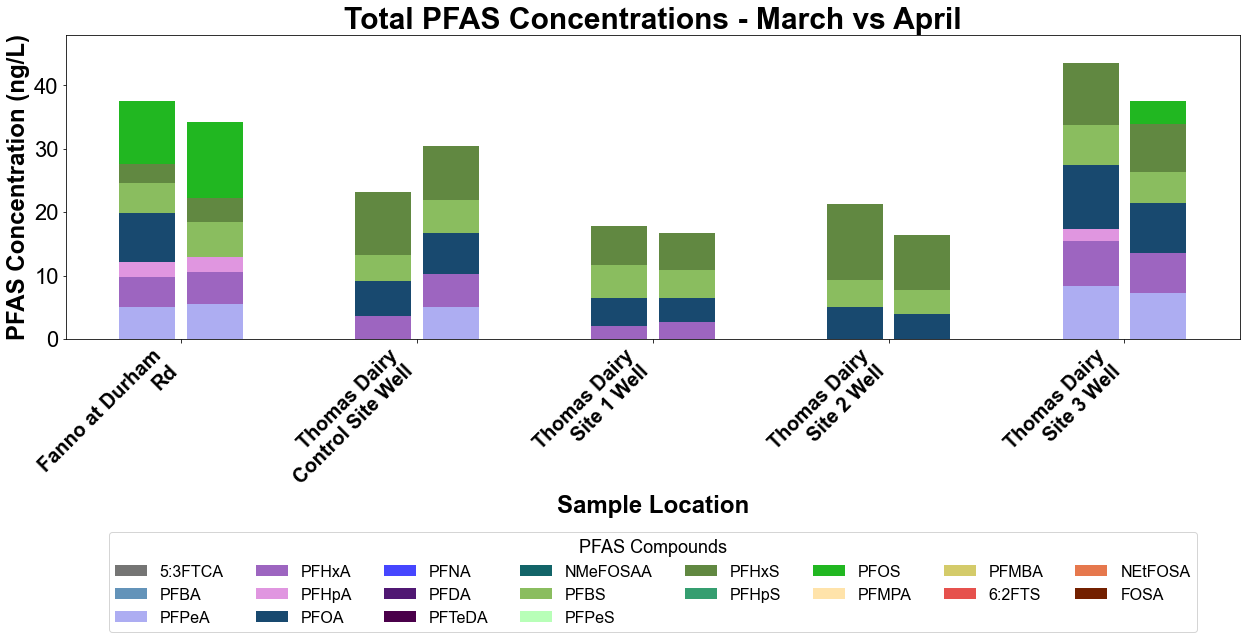

In [46]:
create_seasonal_stacked_bar_chart(season_1_data=avg_pivot_table_March, season_2_data=avg_pivot_table_April,figsize=(18,19), compound_colors_dict=compound_colors_dict_abbrev,
                                   title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=16, bar_width=0.5,
                                   title='Total PFAS Concentrations - March vs April')

Note: Fanno at Durham was sampled twice in April. Sample dated 4/23 was confused with a blank sample, therefore all concentration are 0

## Compare March/April vs Historical Values

### Prep Data

In [47]:
data_locations = ['Durham Influent','Durham Effluent','Fanno at Durham Rd','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']

# Convert the 'Sampled Date' to datetime
data_df['Sampled Date'] = pd.to_datetime(data_df['Sampled Date'], errors='coerce')

data_compounds=data_df['PFAS Compound'].unique()

data_March = data_df[(data_df['Sampled Date'].dt.month == 3) & (data_df['Sampled Date'].dt.year == 2024) & (data_df['Sample Location'].isin(data_locations))]
data_April = data_df[(data_df['Sampled Date'].dt.month == 4) & (data_df['Sampled Date'].dt.year == 2024) & (data_df['Sample Location'].isin(data_locations))]
data_df_March_April=pd.concat([data_March,data_April])

data_Not_MarchApril2024= data_df[ ~((data_df['Sampled Date'].dt.month.isin([3, 4])) & (data_df['Sampled Date'].dt.year == 2024))]

### Define Functions

In [48]:
def PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                              filter_sample_location=None, start_date=None, end_date=None,col_name= 'Quant Incl Estimates Incl Qual Flags'):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if len(filter_pfas_compound) > 0:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if len(filter_sample_location) >0:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values=col_name,
                                     index='Sample Location', columns='PFAS Compound', aggfunc='mean', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [49]:
def create_seasonal_stacked_bar_chart(season_1_data, season_2_data, figsize=(12, 8), title='Seasonal PFAS Concentrations by Sample Location', compound_colors_dict=None,
                                      title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12, bar_width=0.35):
    try:
        font_bold = FontProperties(family='Arial', weight='bold')
        
        # Prepare figure and axes
        fig, ax = plt.subplots(figsize=figsize)
        locations = season_1_data.index.intersection(season_2_data.index)
        
        # Position indices for the bars, now adjusted to include a gap
        x_indices = np.arange(len(locations)) 
        
        gap = 0.025  # This is the gap between bars
        adjusted_width = bar_width / 2 - gap / 2  # Adjust bar width to accommodate gap
        
        dry_bottom = {loc: 0 for loc in locations}
        wet_bottom = {loc: 0 for loc in locations}

        for compound in compound_colors_dict.keys():  # Ensures order is based on the color dictionary
            color = compound_colors_dict[compound]
            dry_heights = [season_1_data.at[loc, compound] if compound in season_1_data.columns else 0 for loc in locations]
            wet_heights = [season_2_data.at[loc, compound] if compound in season_2_data.columns else 0 for loc in locations]

            # Plot dry season data with adjusted positions
            ax.bar(x_indices - adjusted_width - gap, dry_heights, width=adjusted_width, bottom=[dry_bottom[loc] for loc in locations], color=color, label=compound, align='edge')
            # Update bottom heights
            dry_bottom = {loc: dry_bottom[loc] + height for loc, height in zip(locations, dry_heights)}

            # Plot wet season data with adjusted positions
            ax.bar(x_indices + gap, wet_heights, width=adjusted_width, bottom=[wet_bottom[loc] for loc in locations], color=color, label=compound, align='edge')
            # Update bottom heights
            wet_bottom = {loc: wet_bottom[loc] + height for loc, height in zip(locations, wet_heights)}

        # Calculate maximum stack height
        max_stack_height = max(max(dry_bottom.values()), max(wet_bottom.values()))
        # Set y-axis limits
        ax.set_ylim(0, max_stack_height * 1.10)

        # Split label function
        def split_label(label):
            if len(label) > 10:
                split_point = label.find(' ', 10)  # Find next space after 14th character
                if split_point != -1:
                    return label[:split_point] + '\n' + label[split_point + 1:]
            return label  # Return label unmodified if it's short enough or no space found

        # Modify the x-tick labels
        split_xtick_labels = [split_label(label) for label in locations]

        ax.set_xticks(x_indices)
        ax.set_xticklabels(split_xtick_labels, rotation=45, ha='right', fontsize=tick_label_fontsize, fontproperties=font_bold)
        ax.set_xlabel('Sample Location', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_ylabel('PFAS Concentration (ng/L)', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_title(title, fontsize=title_fontsize, fontproperties=font_bold)
        
        # Generate legend only for compounds actually plotted and arrange it below the plot
        handles, labels = ax.get_legend_handles_labels()
        filtered_handles = []
        filtered_labels = []
        seen_labels = set()

        for handle, label in zip(handles, labels):
            if (label in season_1_data.columns and season_1_data[label].sum() > 0) or (label in season_2_data.columns and season_2_data[label].sum() > 0):
                if label not in seen_labels:
                    filtered_handles.append(handle)
                    filtered_labels.append(label)
                    seen_labels.add(label)

        ax.legend(filtered_handles, filtered_labels, title='PFAS Compounds', loc='lower center', bbox_to_anchor=(0.5, -0.99), ncol=7, fontsize=legend_fontsize, title_fontsize=legend_fontsize+2)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

### Define Settings

In [61]:
# All Ambient Locations

# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','', 'probably ok','probably okay','Probably okay','Probably OK','Probably ok']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= data_df['PFAS Compound'].unique()

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Durham Influent','Durham Effluent','Fanno at Durham Rd','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']

rows_order= ['Durham Influent','Durham Effluent','Fanno at Durham Rd','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']
rows_order_reverse=rows_order.reverse()

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2000-01-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-04-30'

col_name= 'All (w BDL= MDL/2) Incl Qual Flags'

### Create Pivot Tables

In [62]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_MarchApril = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df_March_April,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date, end_date=end_date,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_MarchApril.columns]

# Reorder rows by indexing df with the filtered index order
avg_pivot_table_MarchApril = avg_pivot_table_MarchApril.loc[['Durham Influent','Durham Effluent','Fanno at Durham Rd','Thomas Dairy Control Site Well',
                       'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']]
# Reorder columns by indexing df with the desired order
avg_pivot_table_MarchApril = avg_pivot_table_MarchApril[filtered_order]

avg_pivot_table_MarchApril = avg_pivot_table_MarchApril.rename(columns=pfas_mapping)
avg_pivot_table_MarchApril

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Durham Influent,0.350,3.385,2.350,6.590,7.0650,6.9650,2.4800,8.750,1.0500,0.6155,...,0.5750,0.600,0.1195,0.1175,0.1175,1.175,1.175,0.1175,0.2350,0.475
Durham Effluent,0.325,2.175,2.175,9.705,9.1700,10.5500,2.5550,8.695,0.7690,0.4620,...,0.5915,0.575,0.1075,0.1075,0.1120,1.075,1.075,0.1075,0.2175,0.425
Fanno at Durham Rd,0.675,4.625,4.625,3.850,5.3000,4.9000,2.3500,7.550,1.0450,0.7900,...,1.1500,1.200,0.2325,0.2325,0.2325,2.325,2.325,0.2325,0.4625,0.925
Thomas Dairy Control Site Well,0.650,4.400,4.400,4.300,4.1000,4.4500,0.9950,6.050,0.2200,0.2200,...,1.1000,1.150,0.2200,0.2200,0.2200,2.200,2.200,0.2200,0.4400,0.900
Thomas Dairy Site 1 Well,0.675,4.425,4.425,3.750,2.2000,2.4000,0.7250,4.100,0.2225,0.2225,...,1.1000,1.150,0.2225,0.2225,0.2225,2.225,2.225,0.2225,0.4425,0.875
Thomas Dairy Site 2 Well,0.675,4.575,4.575,2.100,0.4575,0.2275,0.2375,4.500,0.2275,0.2275,...,1.1500,1.200,0.2275,0.2275,0.2275,2.275,2.275,0.2275,0.4575,0.925
Thomas Dairy Site 3 Well,0.675,4.425,4.425,6.750,7.8500,6.6500,1.7500,8.950,0.2225,0.2225,...,1.1000,1.150,0.2225,0.2225,0.2225,2.225,2.225,0.2225,0.4425,0.875


In [63]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_NotMarchApril = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_Not_MarchApril2024,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date, end_date=end_date,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_NotMarchApril.columns]

# Reorder rows by indexing df with the filtered index order
avg_pivot_table_NotMarchApril = avg_pivot_table_NotMarchApril.loc[['Durham Influent','Durham Effluent','Fanno at Durham Rd','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']]
# Reorder columns by indexing df with the desired order
avg_pivot_table_NotMarchApril = avg_pivot_table_NotMarchApril[filtered_order]

avg_pivot_table_NotMarchApril = avg_pivot_table_NotMarchApril.rename(columns=pfas_mapping)
avg_pivot_table_NotMarchApril

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS,AOF
Sample Location,,,,,,,,,,,,,,,,,,,,,
Durham Influent,0.70,4.75,4.75,7.878571,7.151429,6.903571,2.507143,40.964286,1.935714,1.977857,...,4.086154,3.144091,3.428636,2.083571,3.340455,3.340455,0.240,2.008929,2.042857,0.0
Durham Effluent,0.70,4.70,4.70,6.916667,9.050000,12.900000,2.358333,21.091667,1.580833,1.375000,...,1.599091,0.999000,1.176500,0.785417,1.210500,1.210500,0.235,0.820417,0.860417,7.9
Fanno at Durham Rd,0.35,2.30,2.30,3.593333,5.563333,5.336667,2.586667,5.231667,1.056667,0.938000,...,0.360000,0.136667,0.181667,1.036667,0.826667,0.826667,0.115,0.277667,0.375000,0.0
Thomas Dairy Control Site Well,0.00,0.00,0.00,5.300000,4.630000,5.268333,1.320000,5.600000,0.243333,0.130000,...,0.346667,0.175000,0.305000,0.178333,0.175000,0.175000,0.000,0.218333,0.218333,0.0
Thomas Dairy Site 1 Well,0.00,0.00,0.00,4.700000,1.800000,1.766667,0.693333,3.766667,0.283333,0.225000,...,0.350000,0.175000,0.305000,0.250000,0.175000,0.175000,0.000,0.218333,0.218333,0.0
Thomas Dairy Site 2 Well,0.00,0.00,0.00,5.133333,0.426667,0.716667,0.130000,2.400000,0.175000,0.130000,...,0.346667,0.171667,0.303333,0.208333,0.171667,0.171667,0.000,0.216667,0.216667,0.0
Thomas Dairy Site 3 Well,0.00,0.00,0.00,4.766667,6.233333,4.966667,1.633333,6.433333,0.170000,0.125000,...,0.336667,0.166667,0.293333,0.127500,0.166667,0.166667,0.000,0.211667,0.211667,0.0


### Create Stacked Bar

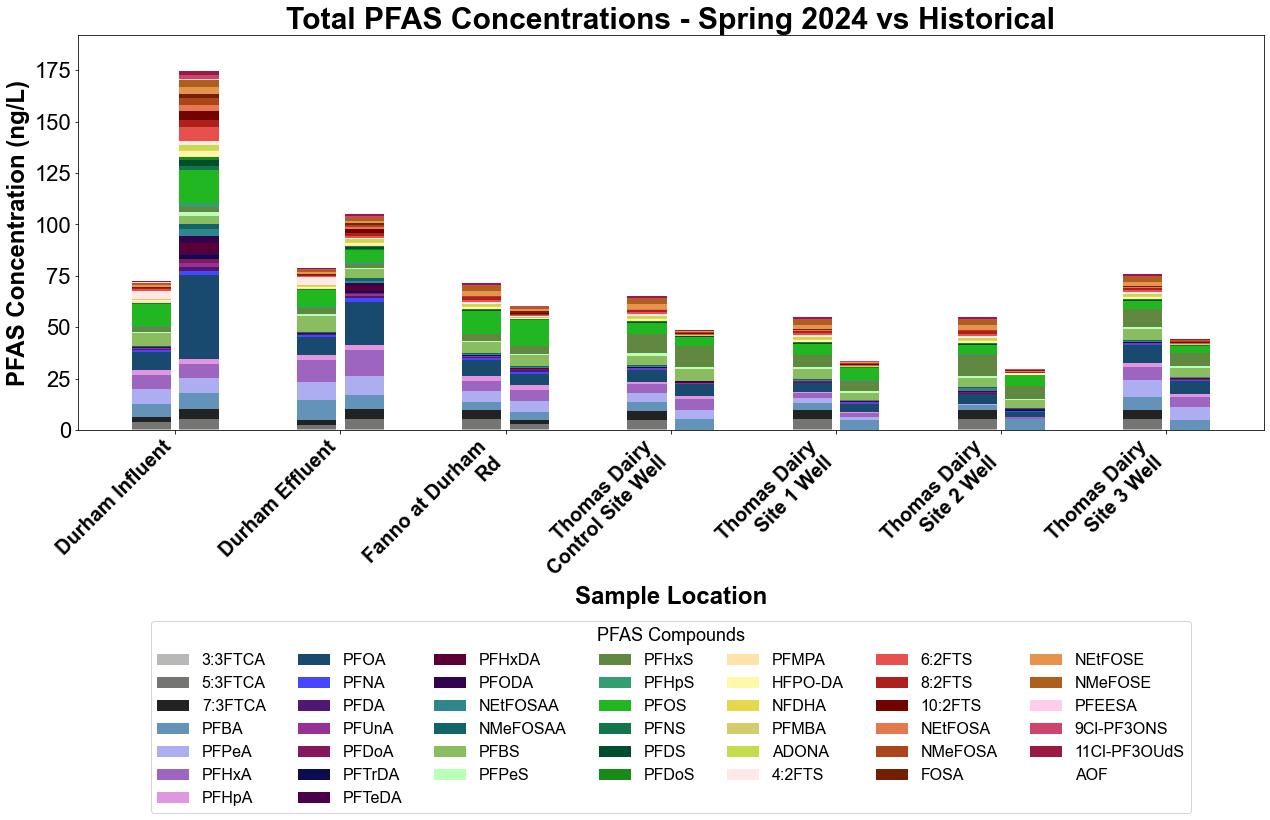

In [66]:
create_seasonal_stacked_bar_chart(season_1_data=avg_pivot_table_MarchApril, season_2_data=avg_pivot_table_NotMarchApril,figsize=(18,24), compound_colors_dict=compound_colors_dict_abbrev,
                                   title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=16, bar_width=0.5,
                                   title='Total PFAS Concentrations - Spring 2024 vs Historical')

## Compare Before, During and After PFAS Concentrations

### Prep Data

In [9]:
data_locations=['Durham Effluent', 'Durham Influent', 'Fanno at Durham Rd',
       'Thomas Dairy Control Site Well', 'Thomas Dairy Site 1 Well',
       'Thomas Dairy Site 2 Well', 'Thomas Dairy Site 3 Well']

df_2023_on=data_df[(data_df['Sample Date'].dt.year.isin([2023,2024]))]
                   
# Before is defined as Feb-April
df_Before = df_2023_on[(df_2023_on['Sample Date'].dt.month.isin([2,3, 4])) & (df_2023_on['Sample Location'].isin(data_locations))]

# During is defined as July 19th-Sep 24th
# NOTE
#Need to update code because irrigation period is different in 2024
#
#
#
df_During = df_2023_on[
    (df_2023_on['Sample Location'].isin(data_locations)) &
    ((df_2023_on['Sample Date'].dt.month == 7) & (df_2023_on['Sample Date'].dt.day >= 19) |
     (df_2023_on['Sample Date'].dt.month == 8) |
     (df_2023_on['Sample Date'].dt.month == 9) & (df_2023_on['Sample Date'].dt.day <= 24))
]

# Ends Sep 24th-End of January
df_After = df_2023_on[
    (df_2023_on['Sample Location'].isin(data_locations)) &
    ((df_2023_on['Sample Date'].dt.month == 9) & (df_2023_on['Sample Date'].dt.day > 24) |
     (df_2023_on['Sample Date'].dt.month == 10) |
     (df_2023_on['Sample Date'].dt.month == 11) |
     (df_2023_on['Sample Date'].dt.month == 12) |
     (df_2023_on['Sample Date'].dt.month == 1))
]


### Define Functions

In [10]:
def PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                              filter_sample_location=None, start_date=None, end_date=None,col_name= 'Quant Incl Estimates Incl Qual Flags'):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if len(filter_pfas_compound) > 0:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if len(filter_sample_location) >0:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values=col_name,
                                     index='Sample Location', columns='PFAS Compound', aggfunc='mean', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [40]:
def create_seasonal_stacked_bar_chart(season_1_data, season_2_data, season_3_data, figsize=(12, 8), title='Seasonal PFAS Concentrations by Sample Location', compound_colors_dict=None,
                                      title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12, bar_width=0.35):
    try:
        font_bold = FontProperties(family='Arial', weight='bold')
        
        # Convert zeros to NaNs to avoid plotting zero-height bars
        season_1_data = season_1_data.replace(0, np.nan)
        season_2_data = season_2_data.replace(0, np.nan)
        season_3_data = season_3_data.replace(0, np.nan)
        
        # Prepare figure and axes
        fig, ax = plt.subplots(figsize=figsize)
        locations = sorted(set(season_1_data.index).union(season_2_data.index).union(season_3_data.index))  # All unique locations across seasons sorted for consistent plotting
        
        # Position indices for the bars, adjusted to include gaps and three seasons
        x_indices = np.arange(len(locations))
        gap = 0.02  # This is the gap between bars
        adjusted_width = (bar_width - 2 * gap) / 3  # Adjust bar width to accommodate three bars
        
        season_bottoms = [{loc: 0 for loc in locations} for _ in range(3)]  # Tracking bottoms for each bar stack in three seasons
        plotted_compounds = set()  # To track which compounds have been plotted with non-zero values

        # Iterate through each compound defined in the color dictionary
        for compound in compound_colors_dict:
            color = compound_colors_dict[compound]
            for i, season_data in enumerate([season_1_data, season_2_data, season_3_data]):
                heights = [season_data.at[loc, compound] if compound in season_data.columns and pd.notna(season_data.at[loc, compound]) else 0 for loc in locations]
                # Plot bars for each season with adjusted positions
                if any(heights):  # Check if there are any non-zero heights
                    plotted_compounds.add(compound)  # Add compound to plotted list if it's actually plotted
                    ax.bar(x_indices + i * (adjusted_width + gap) - bar_width / 2, heights, width=adjusted_width,
                           bottom=[season_bottoms[i][loc] for loc in locations], color=color, label=compound if i == 0 else "", align='edge')
                    # Update bottom heights for stacking
                    season_bottoms[i] = {loc: season_bottoms[i][loc] + height for loc, height in zip(locations, heights)}

        # Calculate the maximum stack height for setting y-axis limits
        max_stack_height = max(max(bottoms.values()) for bottoms in season_bottoms)
        ax.set_ylim(0, max_stack_height * 1.10 if max_stack_height > 0 else 1)  # Adjusting y-axis

        ax.set_xticks(x_indices)
        ax.set_xticklabels([split_label(label) for label in locations], rotation=45, ha='right', fontsize=tick_label_fontsize, fontproperties=font_bold)
        ax.set_xlabel('Sample Location', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_ylabel('PFAS Concentration (ng/L)', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_title(title, fontsize=title_fontsize, fontproperties=font_bold)

        # Only show legend for compounds actually plotted with non-zero values
        handles, labels = ax.get_legend_handles_labels()
        filtered_handles = [h for h, l in zip(handles, labels) if l in plotted_compounds]
        filtered_labels = [l for l in labels if l in plotted_compounds]
        ax.legend(filtered_handles, filtered_labels, title='PFAS Compounds', loc='lower center', bbox_to_anchor=(0.5, -0.9), ncol=8, fontsize=legend_fontsize)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")


In [39]:
def split_label(label):
        if len(label) > 10:
            split_point = label.find(' ', 10)  # Find next space after 14th character
            if split_point != -1:
                return label[:split_point] + '\n' + label[split_point + 1:]
        return label  # Return label unmodified if it's short enough or no space found
        

### Define Settings

In [42]:
# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','', 'probably ok','probably okay','Probably okay','Probably OK','Probably ok']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= data_df['PFAS Compound'].unique()

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Durham Influent','Durham Effluent','Fanno at Durham Rd','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']

rows_order= ['Durham Influent','Durham Effluent','Fanno at Durham Rd','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']
rows_order_reverse=rows_order.reverse()

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2023-01-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-04-30'

col_name= 'All (w BDL= MDL/2) Incl Qual Flags'

### Create Pivot table

In [43]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_Before = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=df_Before,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date, end_date=end_date,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_Before.columns]

# Reorder rows by indexing df with the filtered index order
avg_pivot_table_Before = avg_pivot_table_Before.loc[['Durham Influent','Durham Effluent','Thomas Dairy Control Site Well',
                       'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']]
# Reorder columns by indexing df with the desired order
avg_pivot_table_Before = avg_pivot_table_Before[filtered_order]

avg_pivot_table_Before = avg_pivot_table_Before.rename(columns=pfas_mapping)
avg_pivot_table_Before

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,8:2FTS,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Durham Influent,0.350,3.385,2.350,7.726667,7.043333,6.143333,2.486667,8.533333,1.533333,1.243667,...,2.066667,5,0.1195,0.1175,1.245000,1.175,1.175,0.1175,0.990000,1.150000
Durham Effluent,0.325,2.175,2.175,9.803333,8.346667,10.333333,2.536667,8.396667,1.346000,1.141333,...,2.050000,5,0.1075,0.1075,1.241333,1.075,1.075,0.1075,0.978333,1.116667
Thomas Dairy Control Site Well,0.650,4.400,4.400,4.300000,4.100000,4.450000,0.995000,6.050000,0.220000,0.220000,...,1.150000,0,0.2200,0.2200,0.220000,2.200,2.200,0.2200,0.440000,0.900000
Thomas Dairy Site 1 Well,0.675,4.425,4.425,3.750000,2.200000,2.400000,0.725000,4.100000,0.222500,0.222500,...,1.150000,0,0.2225,0.2225,0.222500,2.225,2.225,0.2225,0.442500,0.875000
Thomas Dairy Site 2 Well,0.675,4.575,4.575,2.100000,0.457500,0.227500,0.237500,4.500000,0.227500,0.227500,...,1.200000,0,0.2275,0.2275,0.227500,2.275,2.275,0.2275,0.457500,0.925000
Thomas Dairy Site 3 Well,0.675,4.425,4.425,6.750000,7.850000,6.650000,1.750000,8.950000,0.222500,0.222500,...,1.150000,0,0.2225,0.2225,0.222500,2.225,2.225,0.2225,0.442500,0.875000


In [44]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_During = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=df_During,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date, end_date=end_date,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_During.columns]

# Reorder rows by indexing df with the filtered index order
avg_pivot_table_During = avg_pivot_table_During.loc[['Durham Influent','Durham Effluent','Thomas Dairy Control Site Well',
                       'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']]
# Reorder columns by indexing df with the desired order
avg_pivot_table_During = avg_pivot_table_During[filtered_order]

avg_pivot_table_During = avg_pivot_table_During.rename(columns=pfas_mapping)
avg_pivot_table_During

PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFUnA,PFDoA,PFTrDA,...,6:2FTS,8:2FTS,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Durham Influent,5.0,7.70,5.0,1.500,5.3,1.00,1.500,1.500,2.000,2.000,...,2.500,3.000,4.000,2.000,3.500,1.500,2.000,2.000,2.500,2.500
Durham Effluent,6.0,11.00,8.9,2.000,5.0,0.90,0.730,0.140,0.185,0.185,...,0.230,0.275,0.370,0.185,0.320,0.140,0.185,0.185,0.230,0.230
Thomas Dairy Control Site Well,7.6,6.20,8.8,1.900,7.9,0.37,0.145,0.145,0.190,0.190,...,0.240,0.285,0.380,0.190,0.335,0.290,0.190,0.190,0.240,0.240
Thomas Dairy Site 1 Well,3.7,2.20,2.0,0.760,3.3,0.22,0.140,0.140,0.185,0.185,...,0.230,0.275,0.370,0.185,0.320,0.140,0.185,0.185,0.230,0.230
Thomas Dairy Site 2 Well,5.7,0.49,1.3,0.135,2.2,0.23,0.135,0.135,0.180,0.180,...,0.225,0.270,0.365,0.180,0.315,0.135,0.180,0.180,0.225,0.225
Thomas Dairy Site 3 Well,4.6,6.60,4.7,1.800,6.0,0.20,0.130,0.130,0.175,0.175,...,0.220,0.260,0.350,0.175,0.305,0.130,0.175,0.175,0.220,0.220


In [45]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates
filter_sample_location=['Durham Influent','Durham Effluent','Thomas Dairy Control Site Well','Thomas Dairy Site 1 Well',
 'Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']
avg_pivot_table_After = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=df_After,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date, end_date=end_date,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_After.columns]

# Reorder rows by indexing df with the filtered index order
avg_pivot_table_After = avg_pivot_table_After.loc[['Durham Influent','Durham Effluent','Thomas Dairy Control Site Well',
                       'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']]
# Reorder columns by indexing df with the desired order
avg_pivot_table_After = avg_pivot_table_After[filtered_order]

avg_pivot_table_After = avg_pivot_table_After.rename(columns=pfas_mapping)
avg_pivot_table_After

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,8:2FTS,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Durham Influent,0.7,4.75,4.75,4.166667,4.773333,4.866667,2.533333,9.600000,1.116667,1.086667,...,1.505000,2.1775,0.806667,1.350,1.413333,1.526667,1.526667,0.240,1.065000,1.223333
Durham Effluent,0.7,4.70,4.70,6.833333,7.200000,10.000000,2.366667,6.566667,1.126667,1.163333,...,1.511667,2.1900,0.808333,1.355,0.625000,1.513333,1.513333,0.235,1.068333,1.228333
Thomas Dairy Control Site Well,0.0,0.00,0.00,7.000000,6.800000,6.600000,1.800000,7.900000,0.280000,0.125000,...,0.250000,0.3350,0.170000,0.295,0.125000,0.170000,0.170000,0.000,0.210000,0.210000
Thomas Dairy Site 1 Well,0.0,0.00,0.00,3.700000,1.600000,1.100000,0.510000,2.800000,0.190000,0.135000,...,0.265000,0.3550,0.180000,0.310,0.320000,0.180000,0.180000,0.000,0.220000,0.220000
Thomas Dairy Site 2 Well,0.0,0.00,0.00,6.000000,0.510000,0.430000,0.130000,3.000000,0.210000,0.130000,...,0.255000,0.3400,0.170000,0.300,0.130000,0.170000,0.170000,0.000,0.215000,0.215000
Thomas Dairy Site 3 Well,0.0,0.00,0.00,5.500000,6.900000,5.900000,1.800000,7.200000,0.230000,0.125000,...,0.250000,0.3350,0.165000,0.290,0.125000,0.165000,0.165000,0.000,0.210000,0.210000


In [46]:
def align_dataframes(df_list):
    """ Ensure all dataframes in the list have the same columns by adding dummy columns with 0s where needed. """
    # Union all columns from all dataframes
    all_columns = sorted(set.union(*(set(df.columns) for df in df_list)))
    
    # Add missing columns with default values of 0
    for df in df_list:
        missing_cols = set(all_columns) - set(df.columns)
        for col in missing_cols:
            df[col] = 0  # Add missing columns with 0s
    
    # Reorder all columns to match the union of all columns
    for i in range(len(df_list)):
        df_list[i] = df_list[i][all_columns]
        
    return df_list

# Assuming avg_pivot_table_Before, avg_pivot_table_During, avg_pivot_table_After are your datasets
dataframes = [avg_pivot_table_Before, avg_pivot_table_During, avg_pivot_table_After]
aligned_dataframes = align_dataframes(dataframes)

# Now aligned_dataframes[0], aligned_dataframes[1], and aligned_dataframes[2] have the same columns
avg_pivot_table_Before, avg_pivot_table_During, avg_pivot_table_After = aligned_dataframes


In [47]:
print(avg_pivot_table_Before.shape)
print(avg_pivot_table_During.shape)
print(avg_pivot_table_After.shape)

(6, 43)
(6, 43)
(6, 43)


### Create Stacked Bar

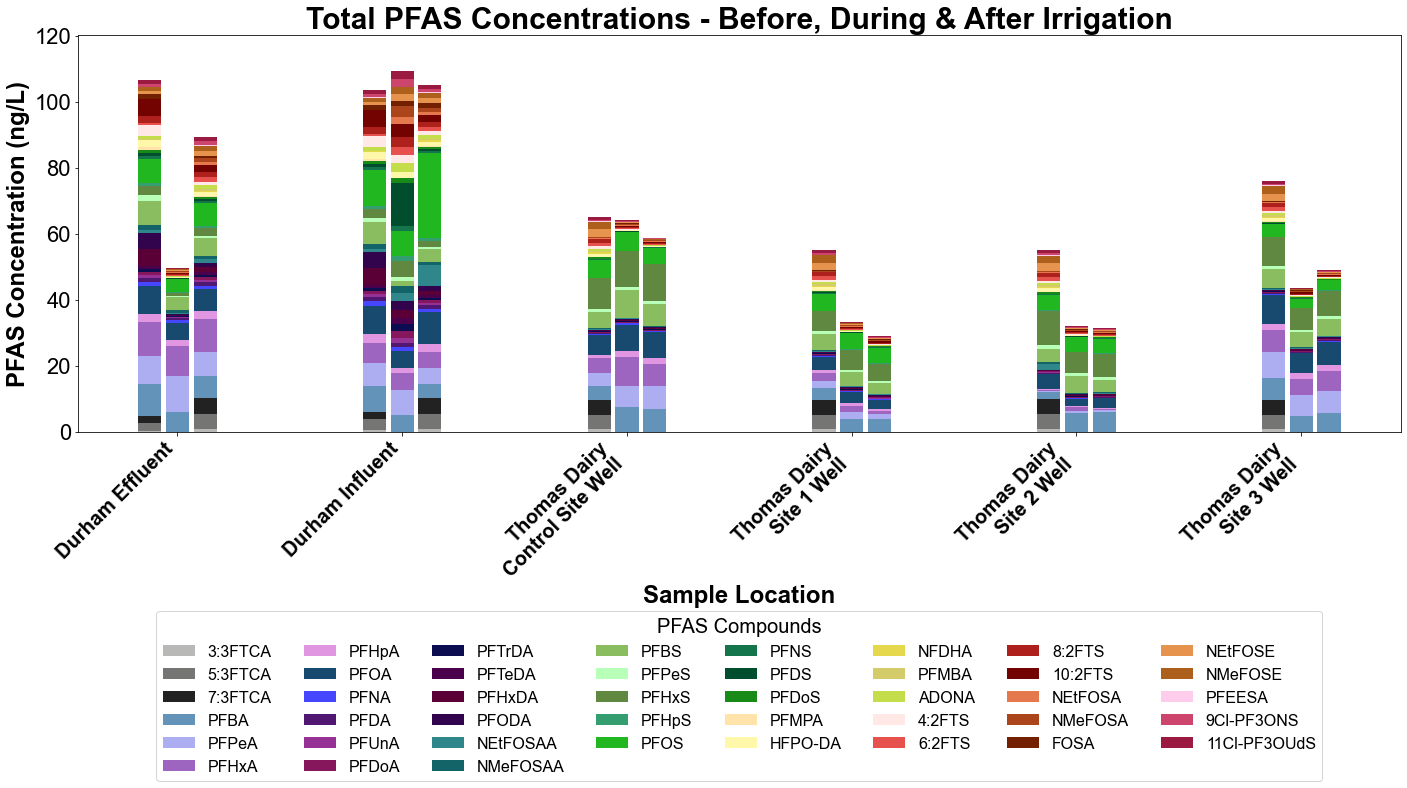

In [50]:
create_seasonal_stacked_bar_chart(season_1_data=avg_pivot_table_Before, season_2_data=avg_pivot_table_During, season_3_data=avg_pivot_table_After, figsize=(20,19), compound_colors_dict=compound_colors_dict_abbrev,
                                   title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=16, bar_width=0.35,
                                   title='Total PFAS Concentrations - Before, During & After Irrigation')

## Data Overview - Check if all Quants resuls are zero by grouping by Sample Location and Sampled Date

### Functions

In [193]:
def create_multilevel_pivot_table(data_df, filter_type=None, filter_qual_summary=None, filter_sample_location=None, filter_dominant_contributor=None, start_date=None, end_date=None):
    """
    Create a multilevel pivot table with filters based on 'Type', 'Qual Summary (Grade for filtering)',
    'Sample Location', 'Dominant Contributor', and 'Sample Date' columns.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_dominant_contributor (list of str, optional): List of 'Dominant Contributor' values to filter the data (default is None).
        start_date (str, optional): Start date in 'YYYY-MM-DD' format (default is None).
        end_date (str, optional): End date in 'YYYY-MM-DD' format (default is None).

    Returns:
        pd.DataFrame: The multilevel pivot table with average values.
    """
    try:
        # Apply filters based on user-provided values
        filtered_data = data_df

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_dominant_contributor:
            filtered_data = filtered_data[filtered_data['Dominant Contributor'].isin(filter_dominant_contributor)]

        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create the pivot table with multilevel rows
        pivot_table = pd.pivot_table(filtered_data, values='Quant Only Incl Qual Flags',
                                     index=['Sample Location', 'Sample Date','Qual Summary (Grade for filtering)'],
                                     columns='PFAS Compound', aggfunc='mean',fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

### Filters and Settings

In [187]:

#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location =['Durham Influent','Durham Effluent','Fanno at Durham Rd','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']
#filter_dominant_contributor (list of str, optional): List of 'Dominant Contributor' values to filter the data (default is None).
filter_dominant_contributor = None
#start_date (str, optional): Start date in 'YYYY-MM-DD' format (default is None).
start_date= '2010-01-01'
#end_date (str, optional): End date in 'YYYY-MM-DD' format (default is None).
end_date = '2024-04-30'

### Create Multi-level Pivot Table 

In [194]:
pivot_table = create_multilevel_pivot_table(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_dominant_contributor=None, start_date=start_date, end_date=end_date)
# Rename the index of data_df using the mapping (No need to change)
pivot_table.columns = pivot_table.columns.map(pfas_mapping)
pivot_table

PFAS Compound                                                            10:2FTS  \
Sample Location          Sample Date Qual Summary (Grade for filtering)            
Durham Effluent          2019-08-22  Good                                    0.0   
                         2020-04-23  Good                                    0.0   
                         2020-06-12  Good                                    0.0   
                         2020-09-23  Good                                    0.0   
                                     Questionable                            NaN   
...                                                                          ...   
Thomas Dairy Site 3 Well 2023-07-14  Questionable                            NaN   
                         2023-09-08  Good                                    0.0   
                         2023-10-06  Good                                    0.0   
                         2024-03-29  Probably ok                             NaN   
                         2024-04-23  Probably ok                             NaN   

PFAS Compound                                                            11Cl-PF3OUdS  \
Sample Location          Sample Date Qual Summary (Grade for filtering)                 
Durham Effluent          2019-08-22  Good                                         0.0   
                         2020-04-23  Good                                         0.0   
                         2020-06-12  Good                                         0.0   
                         2020-09-23  Good                                         0.0   
                                     Questionable                                 NaN   
...                                                                               ...   
Thomas Dairy Site 3 Well 2023-07-14  Questionable                                 NaN   
                         2023-09-08  Good                                         0.0   
                         2023-10-06  Good                                         0.0   
                         2024-03-29  Probably ok                                  0.0   
                         2024-04-23  Probably ok                                  0.0   

PFAS Compound                                                            3:3FTCA  \
Sample Location          Sample Date Qual Summary (Grade for filtering)            
Durham Effluent          2019-08-22  Good                                    NaN   
                         2020-04-23  Good                                    NaN   
                         2020-06-12  Good                                    NaN   
                         2020-09-23  Good                                    NaN   
                                     Questionable                            NaN   
...                                                                          ...   
Thomas Dairy Site 3 Well 2023-07-14  Questionable                            NaN   
                         2023-09-08  Good                                    NaN   
                         2023-10-06  Good                                    NaN   
                         2024-03-29  Probably ok                             0.0   
                         2024-04-23  Probably ok                             0.0   

PFAS Compound                                                            4:2FTS  \
Sample Location          Sample Date Qual Summary (Grade for filtering)           
Durham Effluent          2019-08-22  Good                                   0.0   
                         2020-04-23  Good                                   0.0   
                         2020-06-12  Good                                   0.0   
                         2020-09-23  Good                                   0.0   
                                     Questionable                           NaN   
...                                                                        

In [195]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'Comparison': pivot_table}

#filename: The name of the Excel file to write to.
filename= 'TD_HistoricalComparison.xlsx'
dfs_to_excel(dfs, filename)

File 'TD_HistoricalComparison.xlsx' has been written with 1 tabs.


## PFOS and PFOA Concentrations

### Functions

In [104]:
def create_pivot_table_from_dataframe(data_df, filter_qual_summary=None, filter_sample_location=None, filter_type=None, filter_pfas_compound=None, aggfunc='mean'):
    """
    Create a pivot table from a given DataFrame with specified filters and calculate the specified aggregation function
    for each PFAS Compound and Type.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').
            Supported values: 'mean', 'count', 'std' (standard deviation), 'sum', 'min', 'max', 'median'.

    Returns:
        pd.DataFrame: The pivot table with specified aggregation function applied to the values.
    """
    try:
        # Apply filters based on specified columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'Type' as columns, 'PFAS Compound' as rows, and specified aggregation function as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='PFAS Compound', columns='Sample Location',
                                     aggfunc=aggfunc, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [55]:
def calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate error values for each column in the average pivot table using standard deviation and count.

    Args:
        average_pivot (pd.DataFrame): Pivot table with average values.
        std_dev_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.

    Returns:
        pd.DataFrame: A new pivot table with error values for each column in the average pivot.
    """
    try:
        # Calculate error by dividing standard deviation by the square root of count
        error_pivot = std_dev_pivot / np.sqrt(count_pivot)

        return error_pivot

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [92]:
def create_grouped_bar_chart_with_errors(avg_pivot_table, error_pivot_table, title=None, ylabel=None, figsize=None, colors=None,
                                         title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a grouped bar chart from a pivot table with rows as groups and columns as subgroups, including error bars.

    Args:
        avg_pivot_table (pd.DataFrame): The pivot table containing average data.
        error_pivot_table (pd.DataFrame): The pivot table containing error data (standard deviations).
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.
        title_fontsize (int): Font size for the chart title.
        axis_label_fontsize (int): Font size for the axis labels.
        tick_label_fontsize (int): Font size for the tick labels.
        legend_fontsize (int): Font size for the legend.
    """
    try:
        font_bold = FontProperties(family='Arial', weight='bold')

        # Create a grouped bar chart with error bars
        fig, ax = plt.subplots(figsize=figsize or (10, 6))
        subgroups = avg_pivot_table.columns
        group_indices =  np.arange(len(avg_pivot_table))
        bar_width = 0.1  # Width of each bar within a group
        gap = 0.02  # Gap between each group

        for i, subgroup in enumerate(subgroups):
            x = group_indices + i * (bar_width + gap)
            avg_values = avg_pivot_table[subgroup]
            error_values = error_pivot_table[subgroup]
            bar_color = colors.get(subgroup, 'grey')  # Default color if not specified

            ax.bar(x, avg_values, width=bar_width, color=bar_color, label=subgroup, yerr=error_values, capsize=5)

        # Customize the chart labels and legend
        # convert y-axis to Logarithmic scale
        #plt.yscale("log") #comment out for first plot. This is only for the Biosolids plot
        ax.set_xlabel('PFAS Compounds', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_ylabel(ylabel or 'Average Concentration', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_title(title or 'Grouped Bar Chart of Average Concentrations with Error Bars', fontsize=title_fontsize, fontproperties=font_bold)
        ax.set_xticks(group_indices + (len(subgroups) - 1) * (bar_width + gap) / 2)
        ax.set_xticklabels(avg_pivot_table.index, rotation=0, ha='center')
        # Add minor ticks on the y-axis
        ax.yaxis.set_minor_locator(AutoMinorLocator())

        # Set the legend outside the plot to the right
        ax.legend( loc='lower center', bbox_to_anchor=(0.5, -0.3),ncol=4,fontsize=legend_fontsize, title_fontsize=legend_fontsize)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")

### Filters and Settings

In [105]:
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','', 'probably ok','probably okay','Probably okay','Probably OK','Probably ok']
#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Durham Influent','Durham Effluent','Fanno at Durham Rd','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
#filter_type = ['Biosolids']
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound = ['Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)']

#### Create Pivot Table for Avg Concentrations

In [106]:
Avg_Pivot =create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_pfas_compound=filter_pfas_compound,aggfunc='mean')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
Avg_Pivot.index = Avg_Pivot.index.map(pfas_mapping)

Avg_Pivot=Avg_Pivot.rename(index={'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)'})
Avg_Pivot

Sample Location,Durham Effluent,Durham Influent,Fanno at Durham Rd,Thomas Dairy Control Site Well,Thomas Dairy Site 1 Well,Thomas Dairy Site 2 Well,Thomas Dairy Site 3 Well
PFAS Compound,,,,,,,
PFOS (8C),5.774286,15.276471,11.9,4.82,5.64,4.82,3.52
PFOA (8C),19.320714,36.937500,6.1,5.78,3.90,3.24,7.44


#### Create Pivot Table for Standard Deviation

In [107]:
std_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_pfas_compound=filter_pfas_compound,aggfunc='std')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
std_Pivot.index = std_Pivot.index.map(pfas_mapping)

std_Pivot=std_Pivot.rename(index={'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)'})

std_Pivot

Sample Location,Durham Effluent,Durham Influent,Fanno at Durham Rd,Thomas Dairy Control Site Well,Thomas Dairy Site 1 Well,Thomas Dairy Site 2 Well,Thomas Dairy Site 3 Well
PFAS Compound,,,,,,,
PFOS (8C),3.061326,17.208920,1.931321,1.003494,1.390324,0.739594,0.653452
PFOA (8C),24.462012,70.407461,3.424179,2.854295,0.938083,1.281796,1.634931


#### Create Pivot Table for Sample Count

In [108]:
count_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_pfas_compound=filter_pfas_compound,aggfunc='count')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
count_Pivot.index = count_Pivot.index.map(pfas_mapping)

count_Pivot=count_Pivot.rename(index={'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)'})
count_Pivot

Sample Location,Durham Effluent,Durham Influent,Fanno at Durham Rd,Thomas Dairy Control Site Well,Thomas Dairy Site 1 Well,Thomas Dairy Site 2 Well,Thomas Dairy Site 3 Well
PFAS Compound,,,,,,,
PFOS (8C),14,17,5,5,5,5,5
PFOA (8C),14,16,5,5,5,5,5


#### Create Pivot Table for Sampling Error

In [109]:
average_pivot=Avg_Pivot
std_dev_pivot = std_Pivot
count_pivot=count_Pivot
error_Pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)
error_Pivot

Sample Location,Durham Effluent,Durham Influent,Fanno at Durham Rd,Thomas Dairy Control Site Well,Thomas Dairy Site 1 Well,Thomas Dairy Site 2 Well,Thomas Dairy Site 3 Well
PFAS Compound,,,,,,,
PFOS (8C),0.818174,4.173776,0.863713,0.448776,0.621772,0.330757,0.292233
PFOA (8C),6.537748,17.601865,1.531339,1.276480,0.419524,0.573236,0.731163


#### Create Bar Chart for Avg PFAS Concentrations Using Type as Subgroup

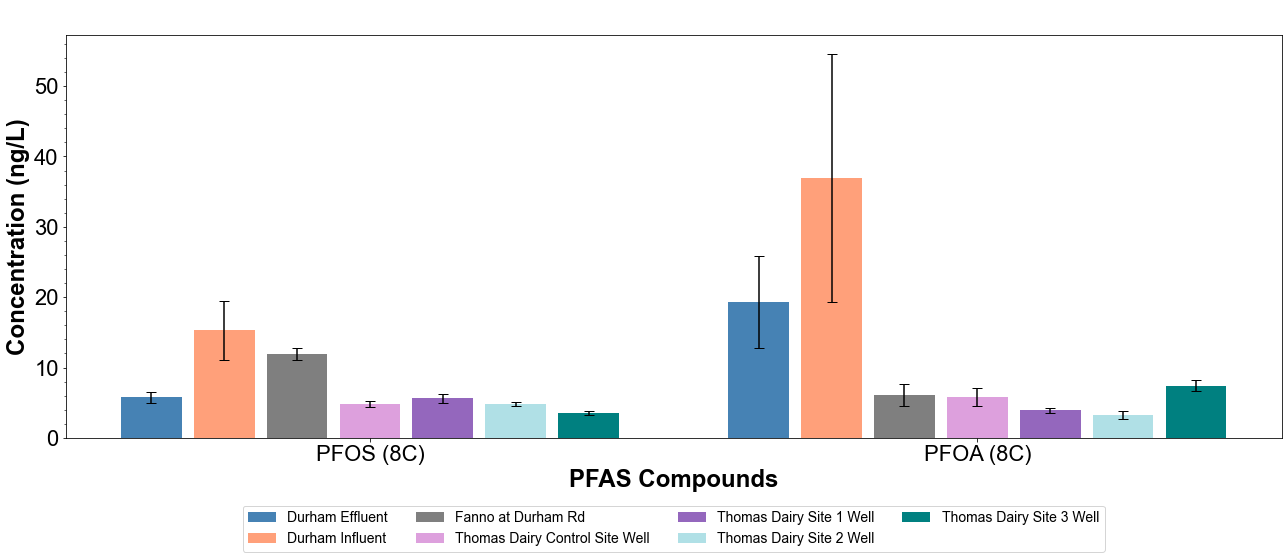

In [110]:
avg_pivot_table=Avg_Pivot
error_pivot_table=error_Pivot

colors_dict = {
    'Durham Effluent': '#4682B4', 
    'Durham Influent': '#FFA07A',  
    'Fanno at Durham Rd': '#7f7f7f',
    'Thomas Dairy Control Site Well': '#DDA0DD',  
    'Thomas Dairy Site 1 Well': '#9467bd',  
    'Thomas Dairy Site 2 Well': '#B0E0E6',
    'Thomas Dairy Site 3 Well': '#008080'  
}
create_grouped_bar_chart_with_errors(avg_pivot_table=avg_pivot_table, error_pivot_table=error_pivot_table,title=' ',colors=colors_dict, ylabel='Concentration (ng/L)', figsize=(18,8),
                                         title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=14)